<a href="https://colab.research.google.com/github/Eric-Mendes/estatisticas-quem-cair-calil/blob/main/dados_quem_cair_calil_20_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DADOS SOBRE A MELHOR LIGA DO UNIVERSO!**

A liga Quem Cair Calil foi criada em 2020 para a temporada 20/21 do
Campeonato Brasileiro de futebol masculino, Série A.

In [14]:
RODADAS = 29

In [2]:
# importando as bibliotecas necessárias para estudar os dados
import numpy as np # matemática
import matplotlib.pyplot as plt # gráficos
import pandas as pd # tabelas

In [3]:
# importando os dados (do github)
url = 'https://raw.githubusercontent.com/Eric-Mendes/estatisticas-quem-cair-\
calil/main/data/pontuacoes_cartola_2020_2021.csv'

# criando um dataFrame (tabela) para a melhor visualização dos dados
df = pd.read_csv(url)
 
# informações da tabela
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RODADA     203 non-null    object 
 1   TIME       203 non-null    object 
 2   PONTUAÇÃO  203 non-null    float64
dtypes: float64(1), object(2)
memory usage: 4.9+ KB


**Tratamento dos dados**

Tornando "RODADA" um número inteiro:

In [4]:
rodadas = list(df['RODADA'])
numero_rodada = [int(rodada.replace('RODADA', '')) for rodada in rodadas]
df.RODADA = numero_rodada
df.head()

,RODADA,TIME,PONTUAÇÃO
0,5,Unichampions,16.54
1,27,Unichampions,20.87
2,8,Unichampions,21.13
3,6,Unichampions,22.35
4,1,Unichampions,23.21


Ordenando os dados por time e rodada:

In [5]:
df = df.sort_values(by=['TIME', 'RODADA'])
df.head()

,RODADA,TIME,PONTUAÇÃO
97,1,Caio do Céu,44.61
90,2,Caio do Céu,31.57
91,3,Caio do Céu,34.23
94,4,Caio do Céu,37.14
100,5,Caio do Céu,50.98


Checando se há pontuação 0 (pois possivelmente significa que o dado não foi pegado de forma correta): 

In [6]:
# checando se há pontuação zero
df.loc[df['PONTUAÇÃO'] == 0.00]

,RODADA,TIME,PONTUAÇÃO
87,12,Caio do Céu,0.0
145,1,Do Pescoço pra Baixo é Canela EC,0.0
116,28,Ibobesta Líbero,0.0
179,1,Janderson maisdez,0.0


Mudando as pontuações 0 que realmente eram erro de obtenção dos dados:

In [7]:
df.at[87, 'PONTUAÇÃO'] = 63.08
df.loc[(df['RODADA'] == 12) & (df['TIME'] == "Caio do Céu")]

,RODADA,TIME,PONTUAÇÃO
87,12,Caio do Céu,63.08


Adicionando a coluna total ao dataFrame:

In [8]:
def get_total(time):
  pontuacoes = list(df['PONTUAÇÃO'].loc[df['TIME'] == time])
  total = []
  soma = 0
  for pontuacao in pontuacoes:
    soma += pontuacao
    total.append(soma)

  return total

In [9]:
df['TIME'].unique()

array(['Caio do Céu', 'Do Pescoço pra Baixo é Canela EC', 'Gigante de JF',
       'Ibobesta Líbero', 'Janderson maisdez', 'Unichampions',
       'Vanculotte Atiantino'], dtype=object)

In [10]:
total_caio = get_total('Caio do Céu')
total_canela = get_total('Do Pescoço pra Baixo é Canela EC')
total_gigante = get_total('Gigante de JF')
total_ibobesta = get_total('Ibobesta Líbero')
total_janderson = get_total('Janderson maisdez')
total_unichampions = get_total('Unichampions')
total_vanculotte = get_total('Vanculotte Atiantino')

total = total_caio + total_canela + total_gigante + total_ibobesta +\
total_janderson + total_unichampions + total_vanculotte

df['TOTAL'] = total
df.head()

,RODADA,TIME,PONTUAÇÃO,TOTAL
97,1,Caio do Céu,44.61,44.61
90,2,Caio do Céu,31.57,76.18
91,3,Caio do Céu,34.23,110.41
94,4,Caio do Céu,37.14,147.55
100,5,Caio do Céu,50.98,198.53


**Lideranças**

Quem liderou mais rodadas? 
Quem liderou mais na classificação geral?

In [ ]:
def classificacao(total=False):
  aux = [i for i in range(len(list(df['TOTAL'])))]
  column = ''
  key=''
  if not total:
    column = 'CLASSIFICAÇÃO NA RODADA'
    key='PONTUAÇÃO'
  else:
    column = 'CLASSIFICAÇÃO GERAL'
    key='TOTAL'
  df[column] = aux

  for i in range(1, RODADAS+1):
    df_aux = df.loc[df['RODADA'] == i].sort_values(by=key, ascending=False)
    times = list(df_aux['TIME'])
    posicao = 1
    for time in times:
      index = df.index[(df.RODADA == i) & (df.TIME == time)]
      df.at[index, column] = posicao
      posicao += 1

In [59]:
rcontagem_unichampions = df['RODADA'].loc[(df['CLASSIFICAÇÃO NA RODADA'] == 1) & \
                                (df['TIME'] == 'Unichampions')].count()
rcontagem_vanculotte = df['RODADA'].loc[(df['CLASSIFICAÇÃO NA RODADA'] == 1) & \
                                (df['TIME'] == 'Vanculotte Atiantino')].count()
rcontagem_caio = df['RODADA'].loc[(df['CLASSIFICAÇÃO NA RODADA'] == 1) & \
                                (df['TIME'] == 'Caio do Céu')].count()
rcontagem_gigante = df['RODADA'].loc[(df['CLASSIFICAÇÃO NA RODADA'] == 1) & \
                                (df['TIME'] == 'Gigante de JF')].count()
rcontagem_janderson = df['RODADA'].loc[(df['CLASSIFICAÇÃO NA RODADA'] == 1) & \
                                (df['TIME'] == 'Janderson maisdez')].count()
rcontagem_canela = df['RODADA'].loc[(df['CLASSIFICAÇÃO NA RODADA'] == 1) & \
                                (df['TIME'] == 'Do Pescoço pra Baixo\
                                 é Canela EC')].count()
rcontagem_ibobesta = df['RODADA'].loc[(df['CLASSIFICAÇÃO NA RODADA'] == 1) & \
                                (df['TIME'] == 'Ibobesta Líbero')].count()

In [61]:
gcontagem_unichampions = df['RODADA'].loc[(df['CLASSIFICAÇÃO GERAL'] == 1) & \
                                (df['TIME'] == 'Unichampions')].count()
gcontagem_vanculotte = df['RODADA'].loc[(df['CLASSIFICAÇÃO GERAL'] == 1) & \
                                (df['TIME'] == 'Vanculotte Atiantino')].count()
gcontagem_caio = df['RODADA'].loc[(df['CLASSIFICAÇÃO GERAL'] == 1) & \
                                (df['TIME'] == 'Caio do Céu')].count()
gcontagem_gigante = df['RODADA'].loc[(df['CLASSIFICAÇÃO GERAL'] == 1) & \
                                (df['TIME'] == 'Gigante de JF')].count()
gcontagem_janderson = df['RODADA'].loc[(df['CLASSIFICAÇÃO GERAL'] == 1) & \
                                (df['TIME'] == 'Janderson maisdez')].count()
gcontagem_canela = df['RODADA'].loc[(df['CLASSIFICAÇÃO GERAL'] == 1) & \
                                (df['TIME'] == 'Do Pescoço pra Baixo\
                                 é Canela EC')].count()
gcontagem_ibobesta = df['RODADA'].loc[(df['CLASSIFICAÇÃO GERAL'] == 1) & \
                                (df['TIME'] == 'Ibobesta Líbero')].count()

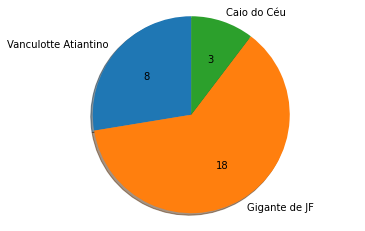

In [63]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Vanculotte Atiantino', 'Gigante de JF', 'Caio do Céu'
sizes = [gcontagem_vanculotte, gcontagem_gigante, \
         gcontagem_caio]

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_autopct

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct=make_autopct(sizes),
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

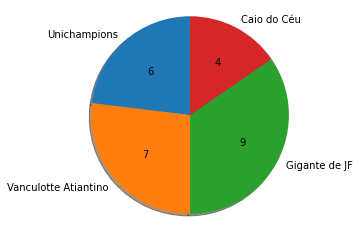

In [58]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Unichampions', 'Vanculotte Atiantino', 'Gigante de JF', 'Caio do Céu'
sizes = [rcontagem_unichampions, rcontagem_vanculotte, rcontagem_gigante, \
         rcontagem_caio]

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_autopct

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct=make_autopct(sizes),
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

**Plotando gráficos**

In [ ]:
def plot_geral(time, COLOR='b', total=False):
  pontuacoes = []
  title = ""
  if not total:
    pontuacoes += list(df['PONTUAÇÃO'].loc[df['TIME'] == time])
    title = "{}: variação de pontuação por rodada".format(time)
  else:
    pontuacoes += list(df['TOTAL'].loc[df['TIME'] == time])
    title = "Variação da pontuação total"
  
  rodadas = [i for i in range(1, 30)]
  plt.title(title)
  plt.ylabel("Pontuação")
  plt.xlabel("Rodada")
  plt.scatter(rodadas, pontuacoes, color=COLOR)
  plt.plot(rodadas, pontuacoes, color=COLOR, label=time)

*Plots:*

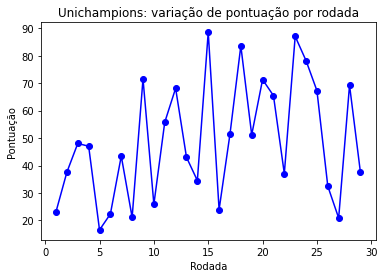

In [ ]:
plot_geral("Unichampions")
plt.show()

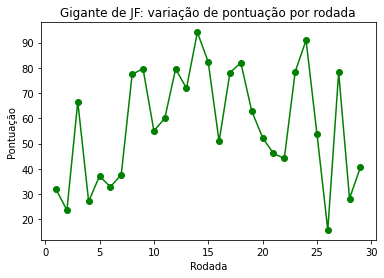

In [ ]:
plot_geral("Gigante de JF", 'g')
plt.show()

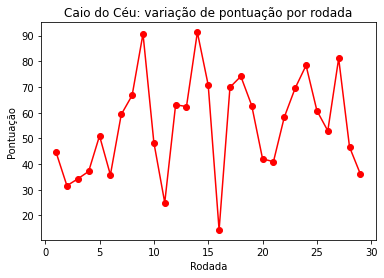

In [ ]:
plot_geral("Caio do Céu", 'r')
plt.show()

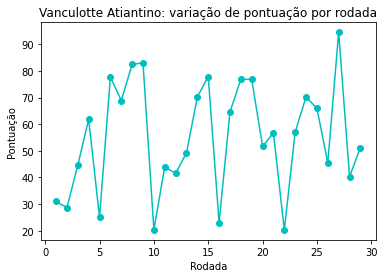

In [ ]:
plot_geral("Vanculotte Atiantino", 'c')
plt.show()

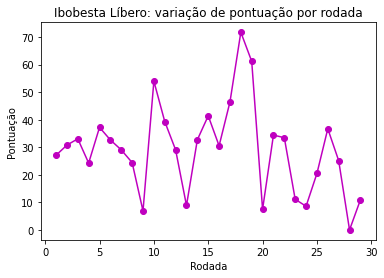

In [ ]:
plot_geral("Ibobesta Líbero", 'm')
plt.show()

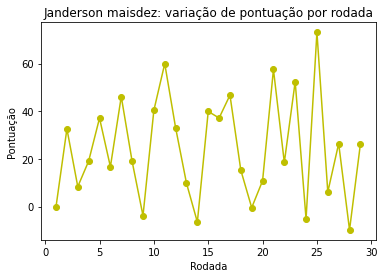

In [ ]:
plot_geral("Janderson maisdez", 'y')
plt.show()

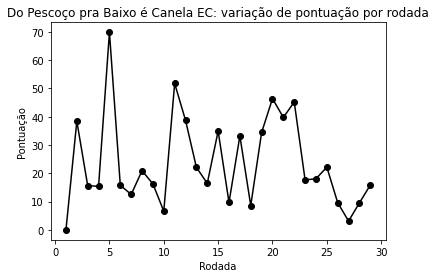

In [ ]:
plot_geral("Do Pescoço pra Baixo é Canela EC", 'k')
plt.show()

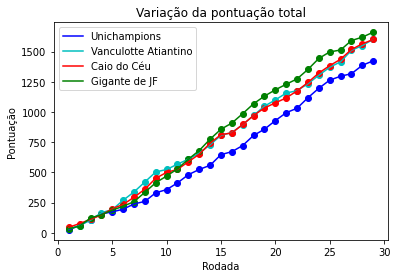

In [ ]:
plt.title("Variação da pontuação total")
plot_geral("Unichampions", total=True)
plot_geral("Vanculotte Atiantino", 'c', True)
plot_geral("Caio do Céu", 'r', True)
plot_geral("Gigante de JF", 'g', True)
plt.legend()
plt.show()

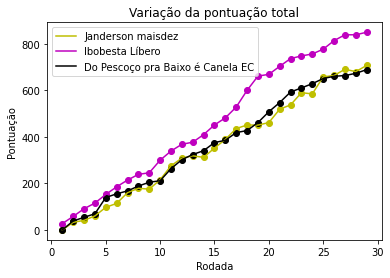

In [ ]:
plt.title("Variação da pontuação total")
plot_geral("Janderson maisdez", 'y', True)
plot_geral("Ibobesta Líbero", 'm', True)
plot_geral("Do Pescoço pra Baixo é Canela EC", 'k', True)
plt.legend()
plt.show()